#### ※ There are many operations that require CPU resource, so i7 would be good if intel cpu is used. 8 to 16 GB of ram is recommended. This project uses machine learning instead of deep learning, so GPU with high specification is not required.

#### ※ please check chromedriver.exe version.

#### ※ please use the trained.pkl model file that came from running main_individual.ipynb from the PC that is running the chatbot.

#### 1.   Research different model serving option(s) and explain what the right choice for your case would be (5 marks) 
##### Answer:  Model serving ways that I researched are django, flask, fastapi. Django provides very useful APIs and other powerful certification and authorizing tools, but it was not perfectly suitable for small projects. This chatbot project will print the result that chatbot gave. Simple framework was needed,so django was removed from choice. For fastapi it supports WSGI (Web Server Gateway Interface and ASGI (Asynchronous Server Gateway Interface), however fastapi is comparatively young to flask, so it did not have many open source resources. Flask was chosen, because it was simpler than django, and had more information to work with compared to fastapi.


#### 2.   Build a web service to host the chosen model(s) as an endpoint (running that locally on your machine is sufficient). The core components of the web service should be:
##### a.   A component to serve the Intent classification


##### Answer: I am going to serve intent classification using the code below. (file path: ./chatbot_ui/intent.py)

In [ ]:
import chatbot_ui.intent
import chatbot_ui.intent_NER_to_answer
import chatbot_ui.NER

sentence = "How long is it from Korea to the US?"
#prediction intent, NER
intent_predict= chatbot_ui.intent.intent_classification(sentence)

##### b.   A component to extract any necessary fields from the user’s input using NER
##### Answer: I am going to extract the components that are necessary using the code below by using NER. (file path: ./chatbot_ui/NER.py)

In [ ]:
NER_predict= chatbot_ui.NER.NER_predict(sentence)
print(NER_predict)

##### c.   A component to calculate the chatbot’s next action, based on the dialogue’s flow
##### Answer: Intent and NER components extracted from above will be used. Chatbot's next action will be derived from make_answer function by using intent and NER components as inputs. (file path: ./chatbot_ui/intent_NER_to_answer.py)

##### d.   Some heuristics to capture the user’s input and then bring all the components together for the chatbot’s response mechanism
##### It is optional to explain the architectural choices but it would be helpful to evaluate if you can present it in your output code/pdf as comments/subsection (25 marks)

#### Answer: I imported intent_NER_to_answer script to the current script for the chatbot's answer function, and used intent and NER in the make_answer script for chatbot answer mechanism.

In [ ]:
# make answer by intent and NER 
response = chatbot_ui.intent_NER_to_answer.make_answer(intent_predict,NER_predict)

print("User: ",sentence)
print("Chatbot: ",response)

#####  3.   Build some functionality to perform testing on the deployed endpoint (i.e., some client function to consume the service via HTTP) and document your process and findings in the notebook. For example, in a “test” notebook you could show how to:
##### a.   initiate the chatbot (maybe some greeting like “hi”)

#### This chatbot's method is to answer the questions of the user without the need of unnecessary conversation, so that it can answer the user's questions quickly.
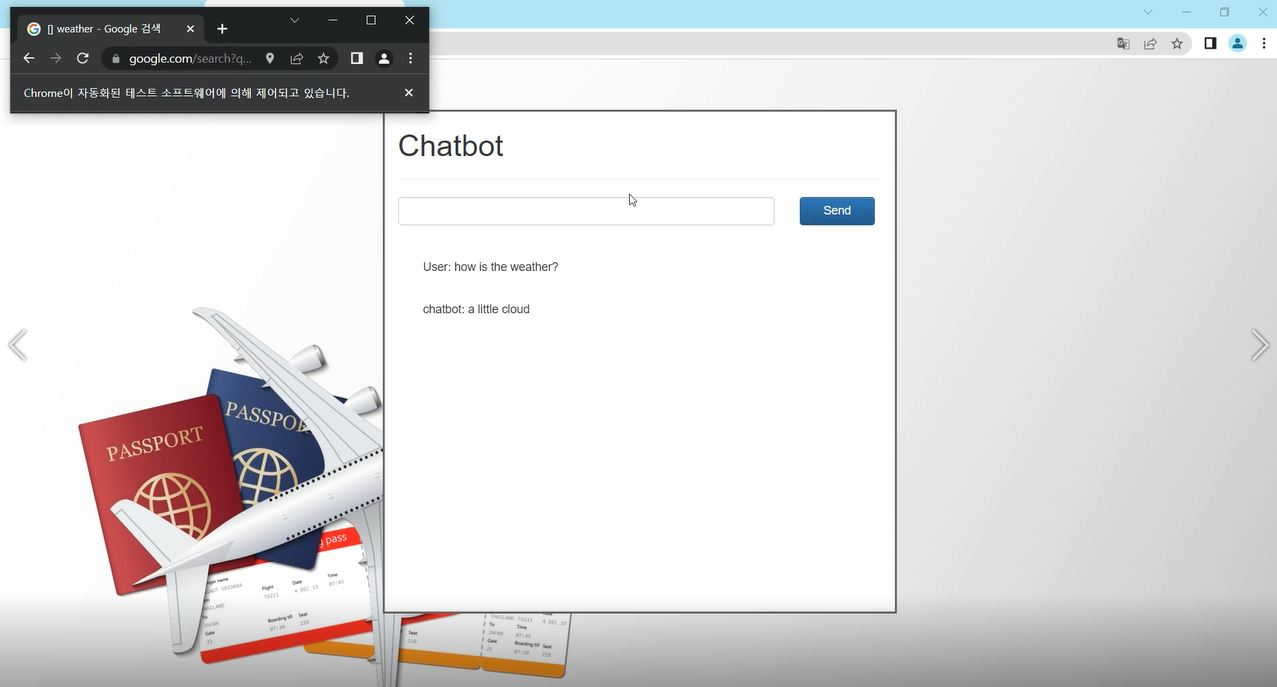

##### b.   make different types or requests (i.e., different intents)

#### I gave questions that are corerelated to 9 intent labels ,and the image below shows some questions that were answered. Correct answers were given by the chatbot. Full testing can be seen in the video.

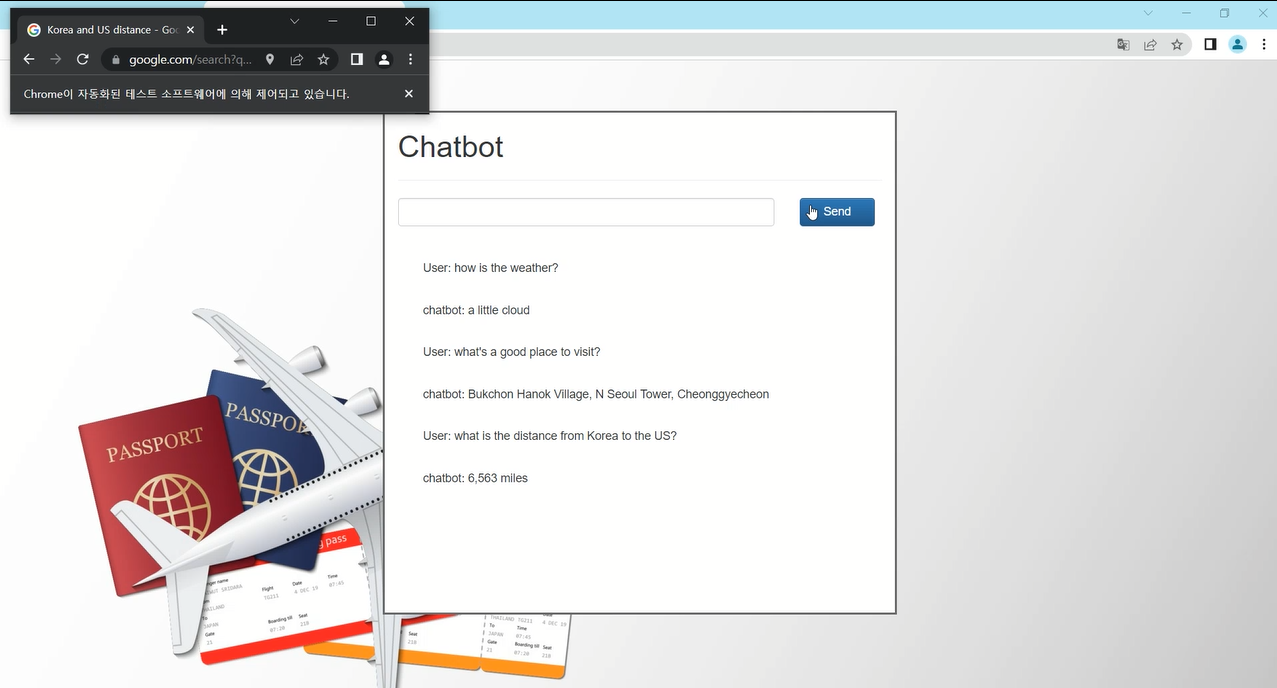

##### c.    try to confuse it and see the reaction

In order to confuse the chatbot, I asked the chatbot to recommned some restaurants nearby to see what would happpen. The image below shows that instead of giving satisfying answer the chatbot gave recommended tourist attractions nearby my current location.

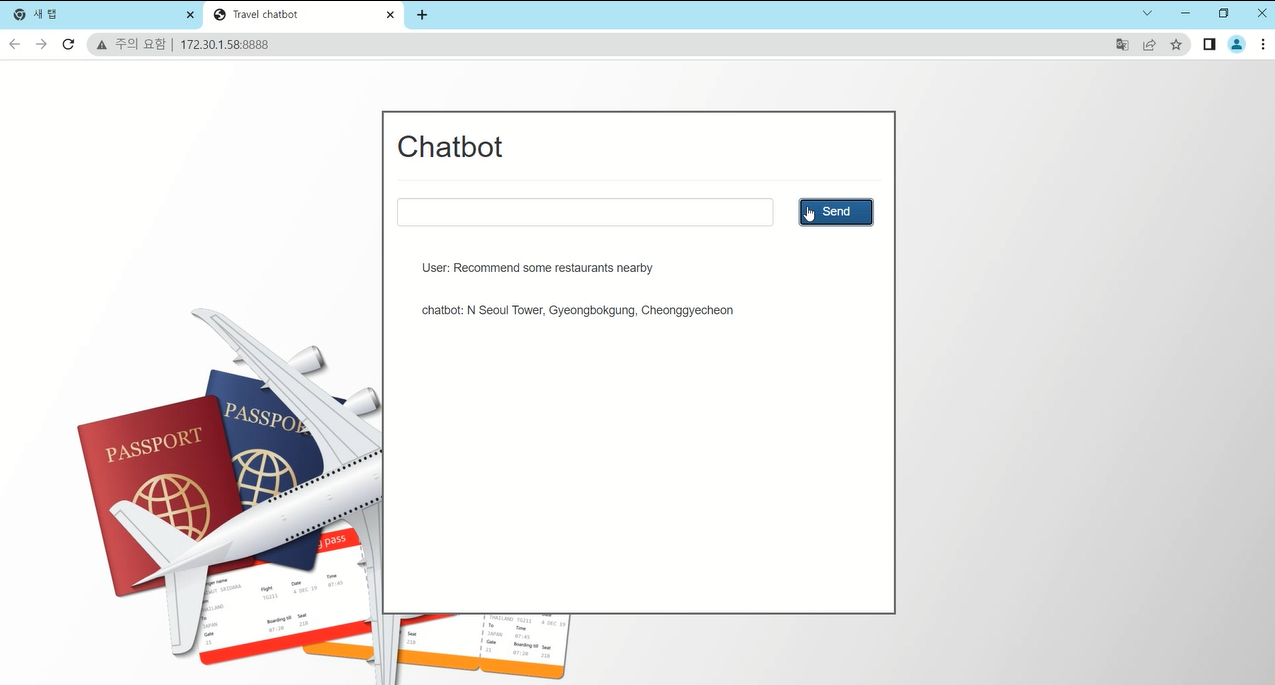

##### d.   show a completed successful request (e.g., a booking, order, troubleshooting, etc.)

#### The image below shows when the chatbot is working correctly, and answering the questions asked by the user.

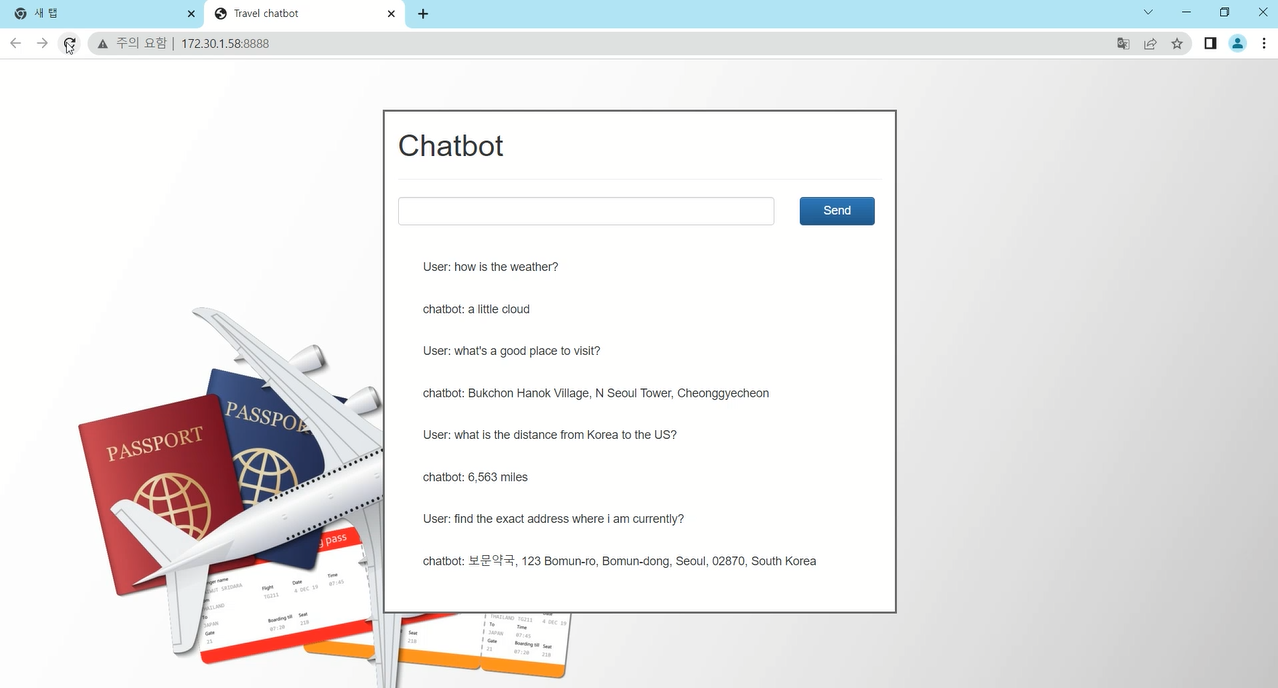

In [ ]:
# start chatbot in flask UI
!python ./chatbot_ui/app.py

##### 4.   Discuss the performance of the chatbot service you implemented (i.e., perform some stretch testing), and justify the good and bad points (5 marks)

##### For this project's good points, this chatbot has correct pipelines to give the user correct answers. Intent classification performance was about 95%, which is not considered low accuracy. Spacy was used for NER, so it is much easier to upgrade the chatbot to give more travel related information for the future users. The bad point of this chatbot is that there needs to be many more answer conditions to give the user answer to many more questions.  Currently the chatbot's answer speed takes about average of 12 seconds to search and retrieve the information from the web. The chatbot needs to improve on answer speed. The model is not too big in file size, based on the size of the pkl file, the model size is about 28Mb, which is not too big. 

#### Reference:
##### 1. chatbot browser background image url: https://es.vecteezy.com/arte-vectorial/2065154-avion-pasaporte-y-tarjeta-de-embarque-en-fondo-vacio-con-espacio-de-copia-para-texto-viaje-fondo-ilustracion-vectorial 

##### 2. flask frame work reference: https://python.plainenglish.io/create-a-deep-learning-chatbot-with-python-and-flask-d75396a4382a

##### 3. selenium: https://www.selenium.dev/documentation/